# *Library and file dependancies*

In [1]:
# Single cell 
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 17})
# Output control
import warnings
warnings.filterwarnings("ignore")

**Also load the processed files and the scGmix pipeline for the component selection method**

In [2]:
adata = sc.read("datasets/processed_cellcounts.h5ad")
padata = sc.read("datasets/processed_pooledcounts.h5ad")
from scGmix import scgmix

# **Dimensionality reduction & Visualization**

For Dimensionality reduction & visualization we utilize the `dimreduction` method of the `scGmix` class we have created from the previous assignment.
In the following configuration it utilizes PCA, with the knee points of the scree plot to select the optimal number of componenets. Additionally it utilizes The computed PCA for a UMAP and TSNE embedding. For more information you can visit [its repository](https://github.com/KyriakosPsa/scGmix-ML-pipeline).

## *PCA*

screeplot selected 9 principal components out of 100


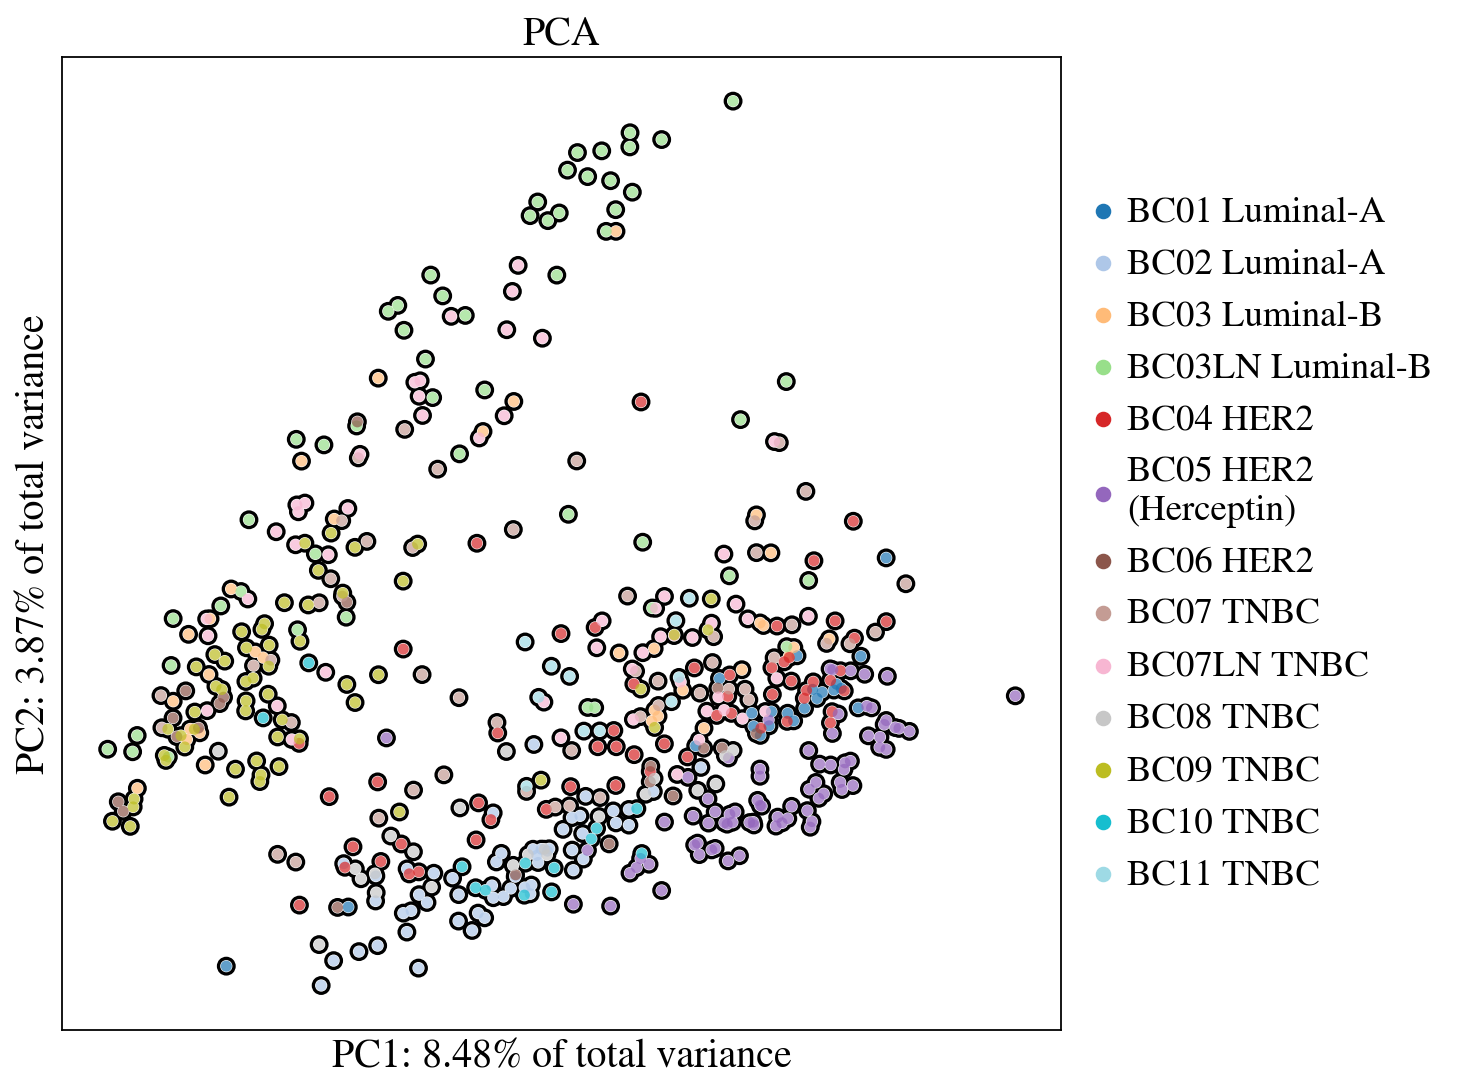

In [3]:
pca_pipeline = scgmix(adata=adata,rand_seed=42,method="PCA")
pca_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True, color="tumor_groups")

## *T-SNE*

For the parameters of t-SNE we follow the paper: [The art of using t-SNE for single-cell transcriptomics](https://www.nature.com/articles/s41467-019-13056-x#Sec2)


- **perplexity**: The attention between local and global aspects of the data, similar to the k neighbors we consider for each node in a graph.,
  - Suggested values: $\begin{cases} 30 + \text{dataset size}/100, & \text{for  }\text{dataset size}/100 \gg 30\\ 30, & else \end{cases}$ as suggested by the paper mentioned above,
 
- **learning rate**: In t-SNE, the learning rate is a parameter that controls the step size during the optimization process. It determines how much the points move in each iteration of the algorithm,
  - Suggested values: $\begin{cases}\text{dataset size}/12, & \text{for  }\text{dataset size} \gg 200 \\ 200, & \text{for  }\text{dataset size} <= 200\end{cases}$ as suggested by the paper mentioned above,

screeplot selected 9 principal components out of 100


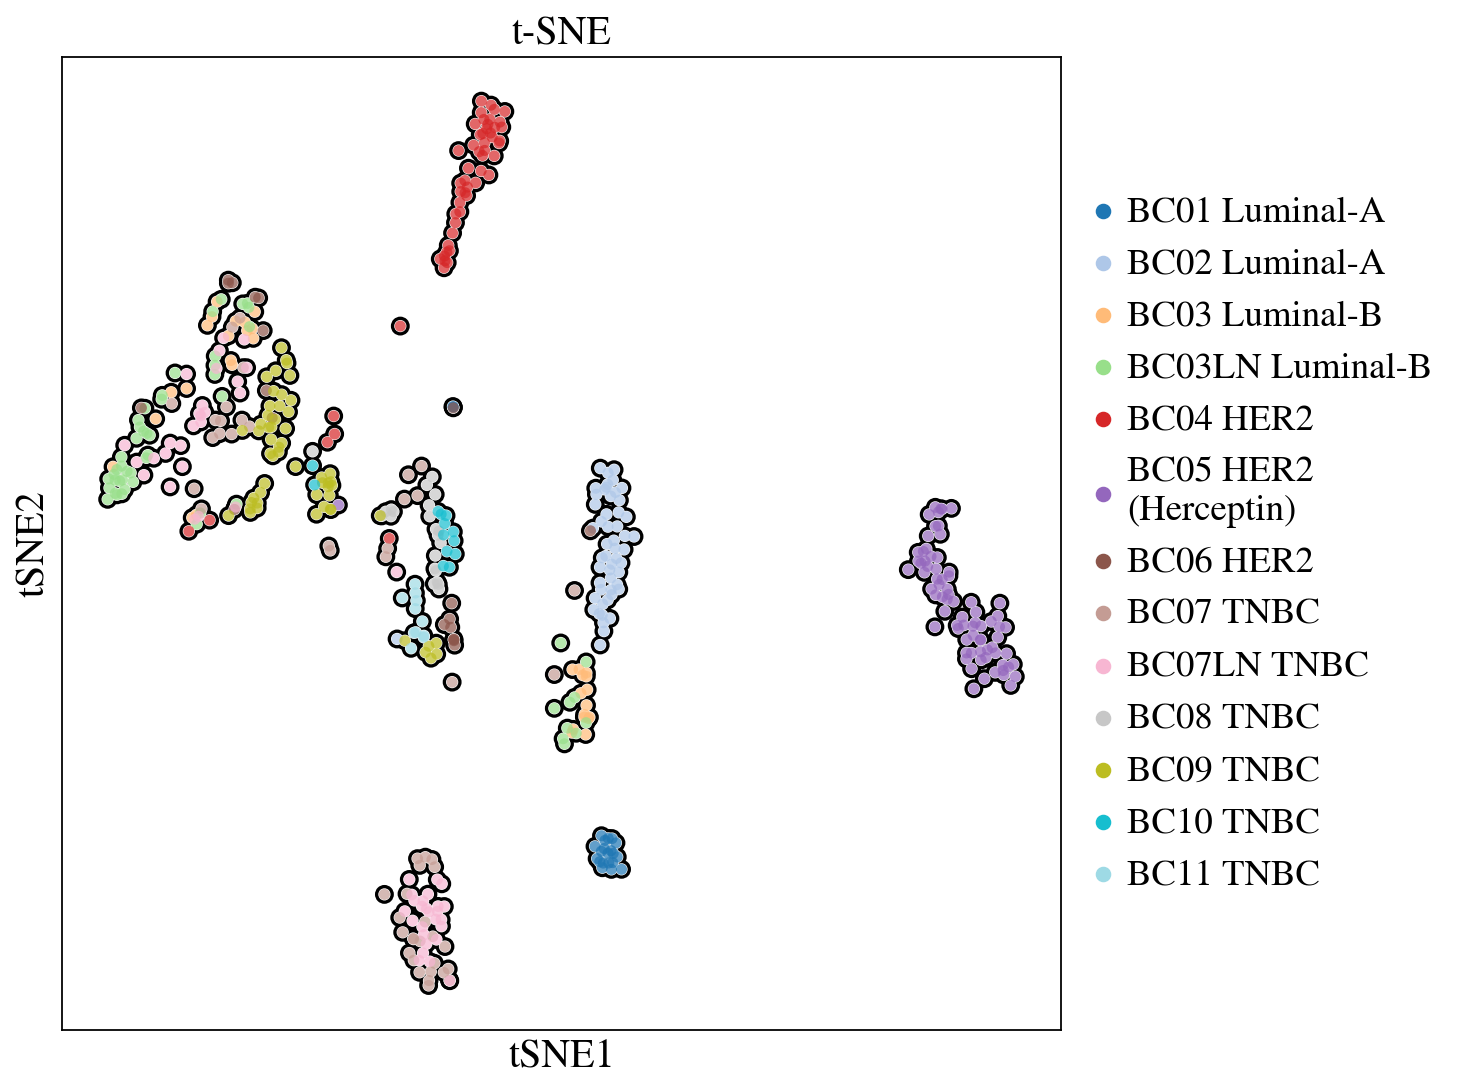

In [4]:
tsne_pipeline = scgmix(adata=adata,rand_seed=42,method="TSNE")
tsne_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True,color="tumor_groups")

As its evident, the cell populations are much more defined than in PCA.

## *UMAP*

For UMAP we experimented with our own parameters and decided to choose `n_neighbors=15` and `min_dist=0.75` which produces well seperated populations much like t-SNE

screeplot selected 9 principal components out of 100


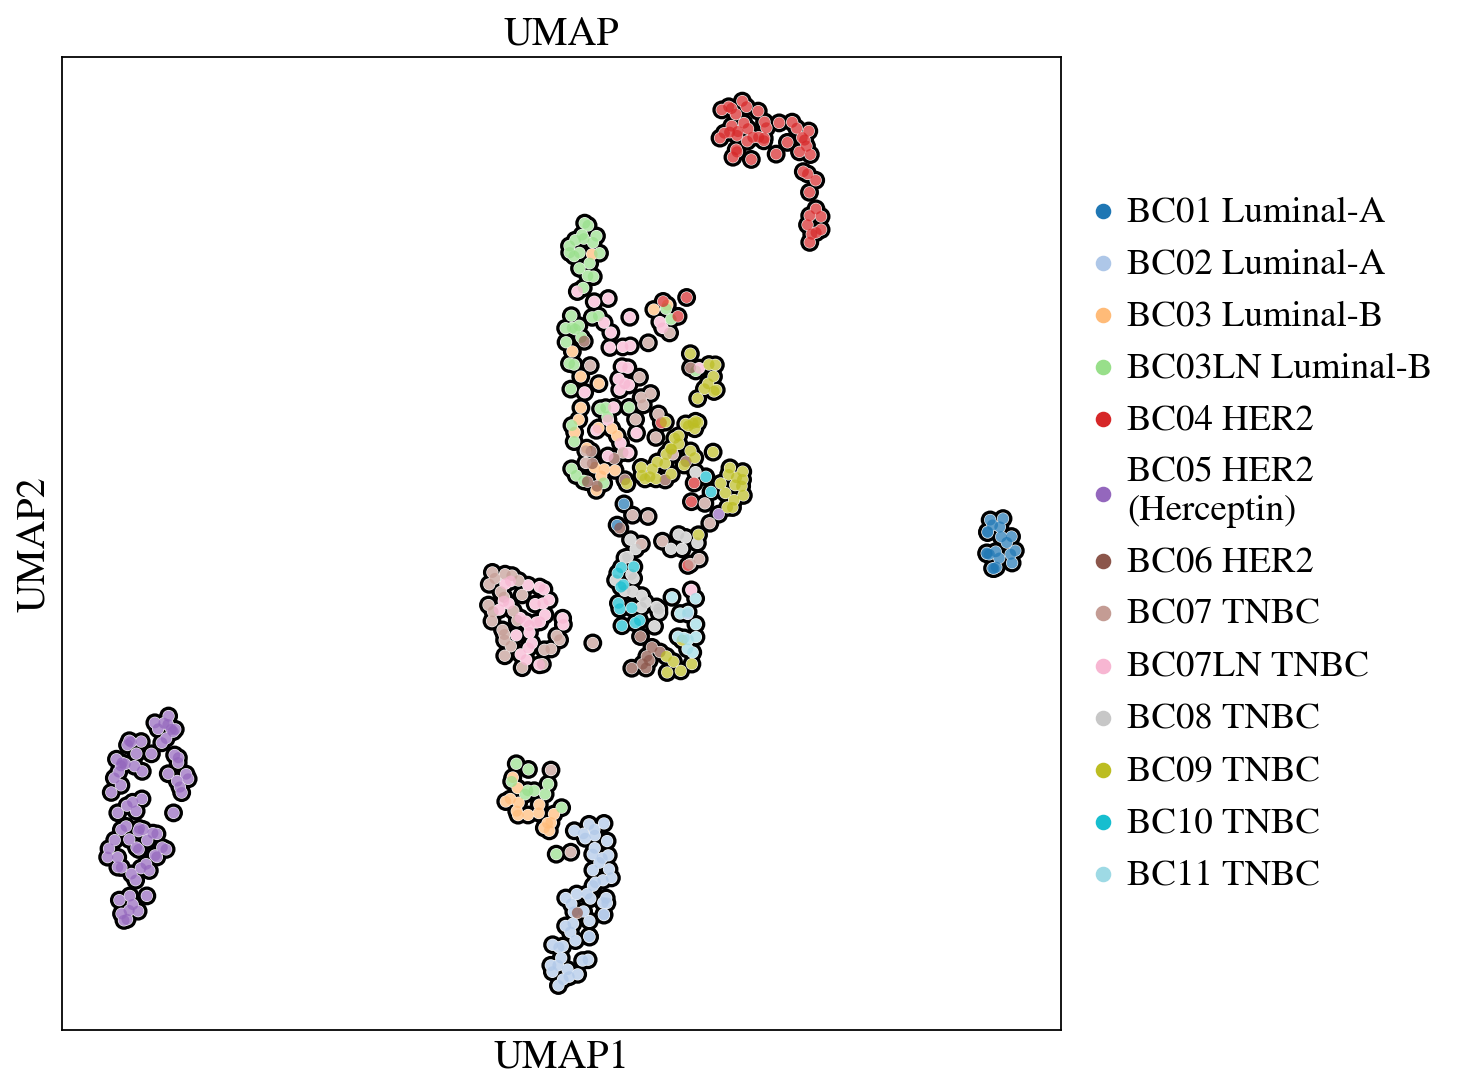

In [5]:
umap_pipeline = scgmix(adata=adata,rand_seed=42,method="UMAP")
umap_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True,color="tumor_groups",n_neighbors=15,min_dist=0.75)

### Visualization results:
It important to note that. Both in TSNE and UMAP  distances between clusters might not mean anything, however the clusters formed give us information about the structure of the local & global structure  of the data. One hypothesis we could consider from these results is that tumour cells create distinct clusters due to their unique gene expression while non-tumour cells would probably lie close together in the larger cluster. We will explore this hupothesis in the seperation of cancer/non-cancer cells with clustering stage.

# **Pre cancer/non-cancer cells correlation analysis**

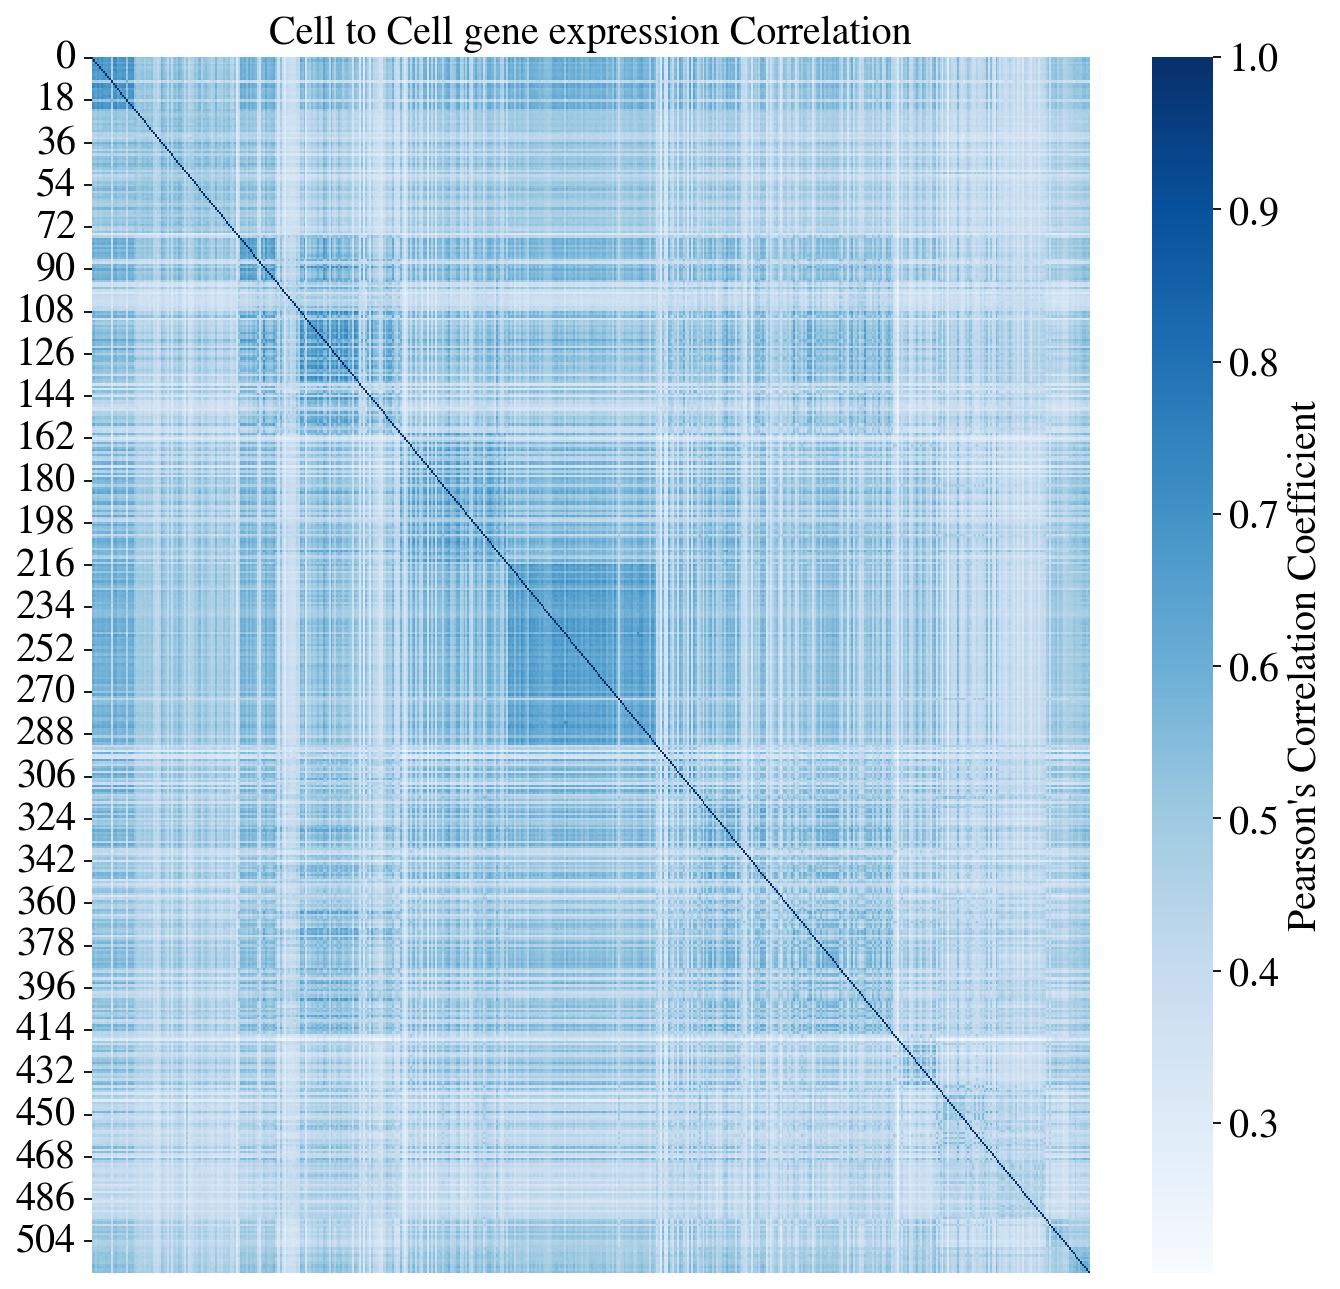

In [9]:
corr = np.corrcoef(adata.X)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues",cbar_kws={"label":"Pearson's Correlation Coefficient"},xticklabels=False)
plt.title("Cell to Cell gene expression Correlation")
plt.show()

Finally we can save the adata object with the annotated information

In [7]:
adata.write("datasets/dimreduced_cellcounts.h5ad")